# Práctica de Visualización

**Equipo:** 9

**Grupo:** 003. Lunes de 6:00 a 9:00 pm

**Integrantes:**
 
* 1808039 Gómez, Karen
* 1937881 Villarreal, Cecilia
* 1741418 Galván, Emmanuel

In [1]:
import pandas as pd

# Base de datos.

Base de datos: [US Police Shootings](https://www.kaggle.com/ahsen1330/us-police-shootings)

**Leer y mostrar los datos sin manipular.**

In [2]:
df_PS = pd.read_csv("shootings.csv")

In [3]:
df_PS.shape

(4895, 15)

In [4]:
df_PS.dtypes 

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
arms_category               object
dtype: object

**NOTA:** Algo que vamos a tener que cambiar es modificar el tipo de dato que son algunas columnas asignandóles valores numérico para su estudio.

In [5]:
df_PS.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [6]:
df_PS.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'arms_category'],
      dtype='object')

**Eliminar columnas no deseadas.**

* name: se eliminó, debido a que el nombre de las personas no es relevante para el análisis.
* body_camera: se eliminó, porque no nos interesa saber si traían una cámara en el cuerpo.

In [7]:
df_PS = df_PS.drop(['name','body_camera'], axis=1)

**Manipulación de los datos tipo null.**

No hay datos tipo null.

In [8]:
df_PS.isnull().sum()

id                         0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
arms_category              0
dtype: int64

**NOTA:** Esto es algo bueno para nosotros, porque no tendremos que ver como manejar estos datos.

**Reenombrar Celdas.**

In [9]:
df_PS = df_PS.rename(columns={'date': 'Dia', 
                              'manner_of_death':'Causa_de_muerte',
                              'armed':'Arma',
                              'age': 'Edad',
                              'gender':'Genero',
                              'race':'Raza', 
                              'city':'Ciudad',
                              'state':'Estado',
                              'signs_of_mental_illness':'Signos_de_enfermedades_mentales',
                              'flee':'Escapo',
                              'threat_level':'Nivel_de_amenaza',
                              'arms_category': 'Categoria_de_armas' })

**NOTA:** Las cambiamos para identificarlos con facilidad en nuestro idioma nativo.

[Rename](https://qastack.mx/programming/11346283/renaming-columns-in-pandas)

**Visualización después de limpieza y exportación de los datos.**

In [10]:
df_PS.head()

,id,Dia,Causa_de_muerte,Arma,Edad,Genero,Raza,Ciudad,Estado,Signos_de_enfermedades_mentales,Nivel_de_amenaza,Escapo,Categoria_de_armas
0,3,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,Guns
1,4,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,Guns
2,5,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,Unarmed
3,8,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,Other unusual objects
4,9,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,Piercing objects


In [11]:
df_PS.shape

(4895, 13)

In [12]:
df_PS.to_csv('DF_USPS.csv', index = False, header = True)

**NOTA:** Aquí le cambiamos el nombre al archivo con una nomenclatura que nos facilite su búsqueda y reconocimiento.

**Estadística básica.**

In [13]:
df_PS['Raza'].value_counts()

White       2476
Black       1298
Hispanic     902
Asian         93
Native        78
Other         48
Name: Raza, dtype: int64

**Observación:** Contabilizamos el número de personas que fueron abatidas, según su raza. Observamos que en la base de datos había predominantemente personas blancas.

In [14]:
df_PS['Raza'].value_counts().sum()

4895

**Observación:** Sumamos la cantidad de individuos por raza para determinar el total de nuestra población, teniendo 4895.

In [15]:
df_PS['Genero'].value_counts()

M    4673
F     222
Name: Genero, dtype: int64

**Observación:** Contabilizamos el número de personas que fueron abatidas, según su género, siendo predominantemente hombres los abatidos.

In [16]:
df_PS['Edad'].describe()

count    4895.000000
mean       36.549750
std        12.694348
min         6.000000
25%        27.000000
50%        35.000000
75%        45.000000
max        91.000000
Name: Edad, dtype: float64

**Observación:** Obtuvimos una descripción de la edad por ser un dato numérico. Donde la edad media esta entre 36 y 37 años, y la edad mayor que se tiene entre los individuos que fueron abatidos es de 91 años.

**Nota:** No usamos otras herramientas estadísticas,por el tipo de variables que tenemos (en su mayoría categóricas).

**Conteo y proporción de Raza.**

<AxesSubplot:title={'center':'Gráfica de barras por raza'}>

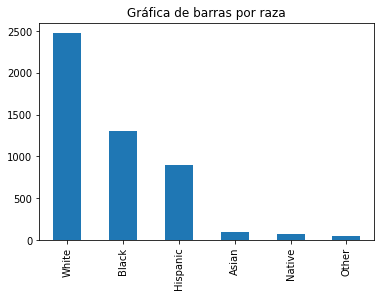

In [17]:
df_PS['Raza'].value_counts().plot.bar(title="Gráfica de barras por raza")

**Descripción:** Gráfica de barras para el contador de personas separadas por su raza.

In [18]:
import matplotlib.pyplot as plt

In [19]:
import seaborn as sns

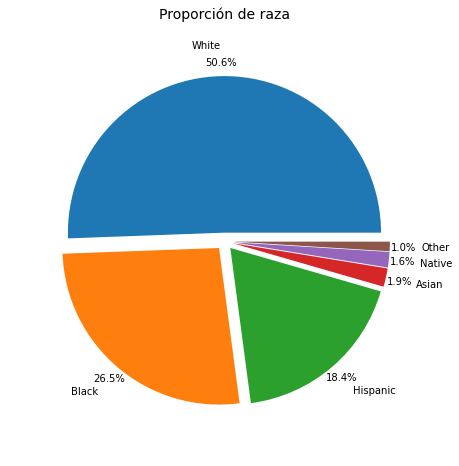

In [20]:
pie, ax = plt.subplots(figsize=[12,8])
labels = df_PS['Raza'].value_counts().keys()
plt.pie(x = df_PS['Raza'].value_counts(),
        autopct = '%.1f%%', explode=[0.05]*6,
        labels=labels,
        pctdistance=1.09,
        labeldistance = 1.2,
        radius = 0.9)
plt.title("Proporción de raza", fontsize=14)
plt.show()

*Gráfica de pastel de la proporción de personas de cada raza.*

**Descripción:** Aquí se aprecía mejor que un poco más del 50% de la población es blanca, seguida en menos proporción por individuos de tez negra.

**Estados con mayor incidencia.**

<AxesSubplot:title={'center':'Gráfico de barra por estados'}>

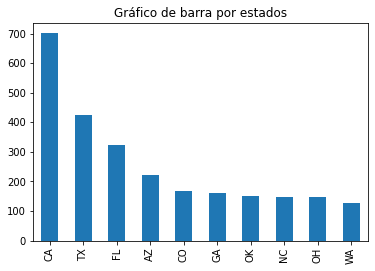

In [21]:
df_PS['Estado'].value_counts().sort_values(ascending = False).head(10).plot.bar(title="Gráfico de barra por estados")

*Gráfica de conteo de incidentes de los 10 estados con mayor incidencia.*

**Descripción:** Este gráfico nos muestra los 10 estados con más acribillados por agentes policiales, siendo California y Texas, los de mayor incidencia.

In [22]:
orden = df_PS['Estado'].value_counts().sort_values(ascending = False).keys()[0:10]

C:\Users\almac\anaconda3\envs\R y Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Estado', ylabel='count'>

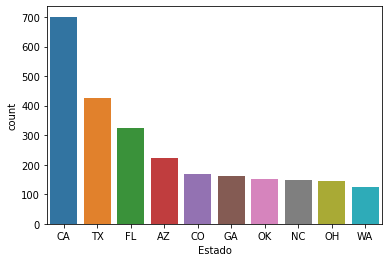

In [23]:
sns.countplot(df_PS['Estado'], order = orden)

*Gráfica de conteo de incidentes de los 10 estados con mayor incidencia. Versión Seaborn de colores. Esta gráfica muestra cada barra por colores por lo que puede ser más fácil identificar cada estado. Mejor que la versión de pandas.*

**Análisis de las edades.**

<AxesSubplot:title={'center':'Gráfico de línea por edades'}>

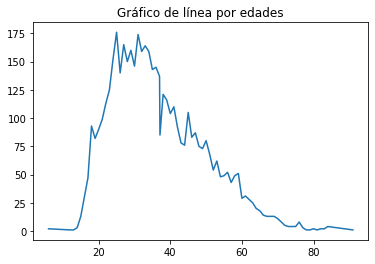

In [24]:
df_PS['Edad'].value_counts().sort_index().plot(title="Gráfico de línea por edades")

*Gráfica de línea de conteo de edades para observar la distribución que tienen las edades.*

**Descripción:** Aquí se aprecia que las edades más frecuentes que tienen los individuos abatidos estan entre los 30 y 38 años, aproximadamente.

<AxesSubplot:xlabel='Edad', ylabel='Density'>

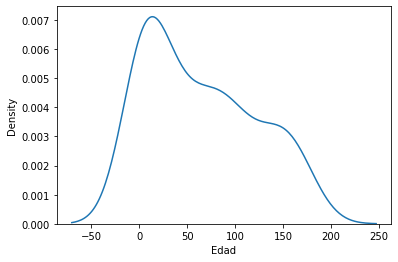

In [25]:
sns.kdeplot(df_PS['Edad'].value_counts().sort_index())

*Gráfica de línea de conteo de edades para observar la distribución que tienen las edades con técnica de KDE.*

<AxesSubplot:>

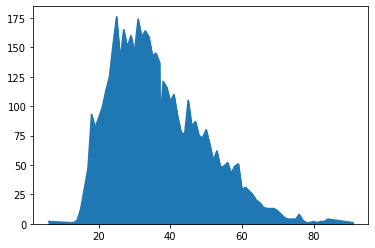

In [26]:
df_PS['Edad'].value_counts().sort_index().plot.area()

*Gráfica de área de conteo de edades para observar la distribución que tienen las edades.*

<AxesSubplot:ylabel='Frequency'>

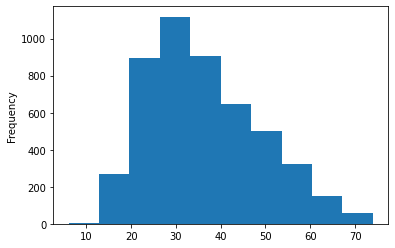

In [27]:
df_PS[df_PS['Edad'] < 75]['Edad'].plot.hist()

*Histograma de frecuencias de edades menores a 75 años.*

**Descripción:** Mediante este gráfico se aprecia mejor el rango de edades con mayor repetición de incidentes, estando entre 25 y 35 mayormente, seguido por los 20 y 25 y los 35 y 40 años.

C:\Users\almac\anaconda3\envs\R y Python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Edad'>

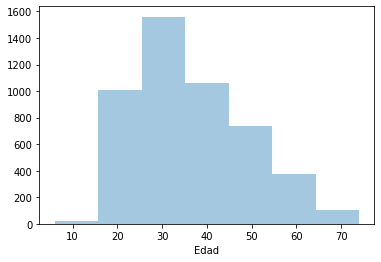

In [28]:
sns.distplot(df_PS[df_PS['Edad'] < 75]['Edad'], bins = 7, kde = False)

*Histograma de frecuencias de edades menores a 75 años con 7 divisiones.*

C:\Users\almac\anaconda3\envs\R y Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Edad', ylabel='count'>

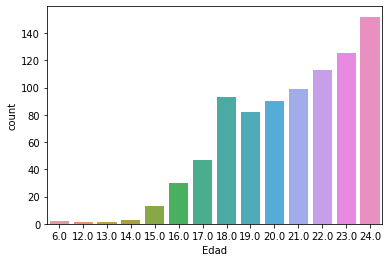

In [29]:
sns.countplot(df_PS[df_PS['Edad'] < 25]['Edad'])

*Grafica de barras de las edades de los individuos por seaborn. Este gráfico de colores podría ayudar a identificar mejor las diferentes barras.*

**Descripción:** Este gráfico nos facilita ver la cantidad de personas jóvenes y niños abatidos, donde es pequeña la cantidad de infantes. Aquí se ver mayor incidencia apartir de los 18.

<AxesSubplot:xlabel='Estado', ylabel='Edad'>

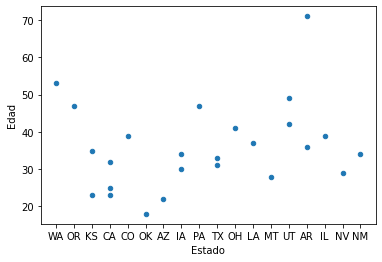

In [30]:
df_PS.head(25).plot.scatter(x='Estado', y='Edad')

*Gráfica de dispersión de los estados y las edades.*

**Descripción:** De los estados que se presentaron, se puede observar que los incidentes se encuentran mayormente entre los 25 y 38 años, aproximadamente.

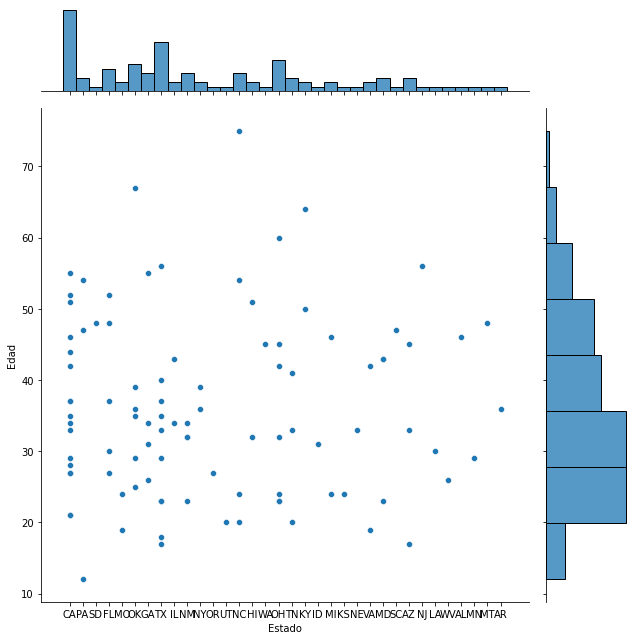

In [31]:
sns.jointplot(x='Estado', y='Edad', data = df_PS.sample(100), height = 9)

*Gráfica de dispersión de los estados y las edades de una muestra de 100 elementos con histograma de cada uno.
Esta gráfica es similar a la de dispersión de pandas, sin embargo el poder observar el histograma puede ser favorable para identificar más información.*

**Descripción:** Tomando la muestra, se ve que los casos se dieron mayormente en personas entre los 25 y 38 años, donde hay una parte considerable de ese grupo que son de California.

In [32]:
Conteo_incidentes = df_PS['Raza'].groupby([df_PS['Estado'], df_PS['Raza']]).count().unstack().fillna(0)

<AxesSubplot:xlabel='Estado'>

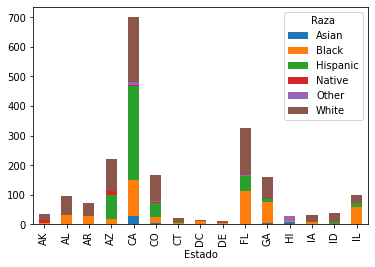

In [33]:
Conteo_incidentes.head(15).plot.bar(stacked = True)

*Gráfica de incidentes apiladas por razas de 15 estados.*

**Descripción:** Analizando, se tiene que al menos en estos estados, los incidentes corresponden a personas blancas mayormente, este resultado es el esperado dada la gran cantidad de personas blancas en la base de datos.

Y en California, dado que es uno de los estados con mayor población de hispanos, se ve que hay una cantidad considerable de casos de hispanos.

<AxesSubplot:xlabel='Estado'>

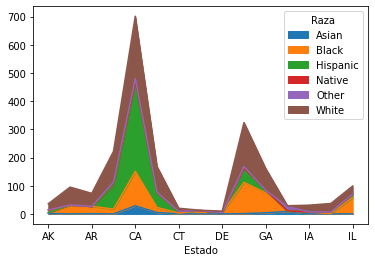

In [34]:
Conteo_incidentes.head(15).plot.area()

*Gráfica de área de incidentes apilados por raza.*

<AxesSubplot:xlabel='Estado'>

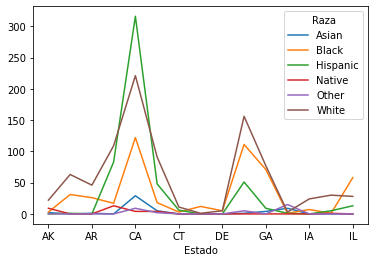

In [35]:
Conteo_incidentes.head(15).plot.line()

*Gráfica de líneas de incidentes apiladas por raza.*

<AxesSubplot:xlabel='Raza', ylabel='Edad'>

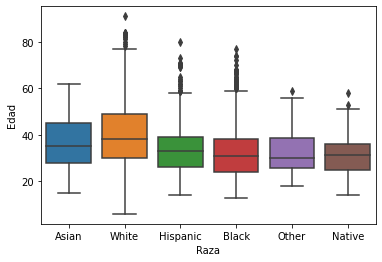

In [36]:
sns.boxplot(x = 'Raza', y = 'Edad', 
            data = df_PS[df_PS.Raza.isin(df_PS.Raza.value_counts().index)])

*Gráfica de caja para las edades de cada una de las diferentes razas.*

**Descripción:** Aquí se aprecia que sin importar la raza, los incidentes se presentan mayormente en personas entre los 30 y 40 años, aunque la mediana varía según la raza por una diferencia pequeña.

<AxesSubplot:xlabel='Raza', ylabel='Edad'>

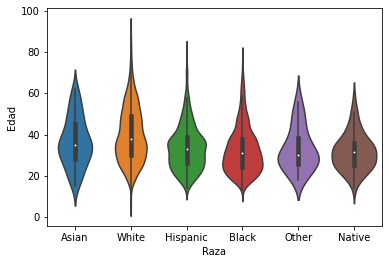

In [37]:
sns.violinplot(x = 'Raza', y = 'Edad', 
            data = df_PS[df_PS.Raza.isin(df_PS.Raza.value_counts().index)])

*Gráfica de violín para las edades de cada una de las diferentes razas.*

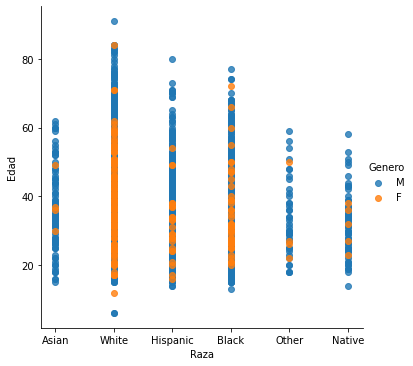

In [38]:
sns.lmplot(x = 'Raza', y = 'Edad', hue = 'Genero', 
           data = df_PS, 
           fit_reg=False)

*Gráfica por edad y raza. El eje x tiene una variable categórica por lo que los puntos se muestran en vertical. El color de cada punto esta separado por género.*

**Descripción:** Analizando los abatidos por género y edad, en el caso de las mujeres no hay un patrón común por edad, aunque ha de notarse que en el caso de las personas de raza blanca y negra es donde hay más mujeres abatidas. En el caso de los hombres, son generalmente abatidos entre los 20 y 60 años.

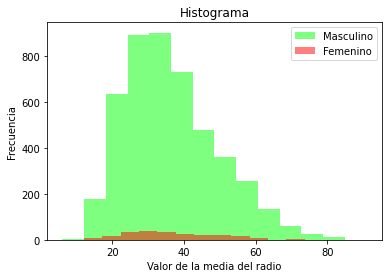

In [39]:
m = plt.hist(df_PS[df_PS["Genero"] == "M"].Edad,bins=14,fc = (0,1,0,0.5),label = "Masculino")
f = plt.hist(df_PS[df_PS["Genero"] == "F"].Edad,bins=14,fc = (1,0,0,0.5),label = "Femenino")
plt.legend()
plt.xlabel("Valor de la media del radio")
plt.ylabel("Frecuencia")
plt.title("Histograma")
plt.show()

*Histograma bi-variable de edades separados por género.*

**Descripción:** Aquí se ha de puntualizar que hay más hombres abatidos que de mujeres.

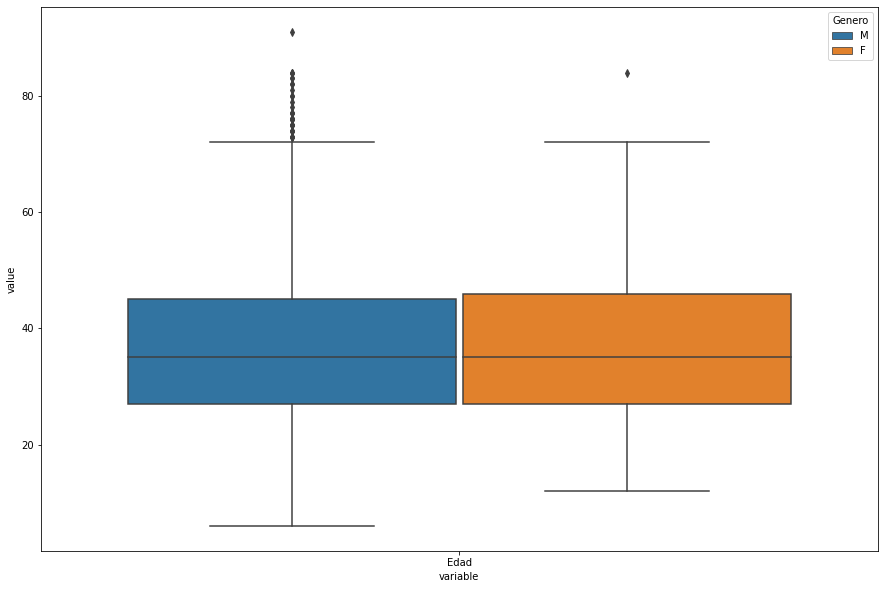

In [40]:
mdata = pd.melt(df_PS,id_vars = "Genero",value_vars = ['Edad'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="Genero",data= mdata)
plt.show()

Gráfica de caja de edad separado por género. 

**Nota:** Solo se tiene una variable numérica, por lo que no se puede hacer multivariable.

**Descripción:** El rango de edad donde hay mayor incidencia de decesos es casi igual tanto para hombres como para mujeres.

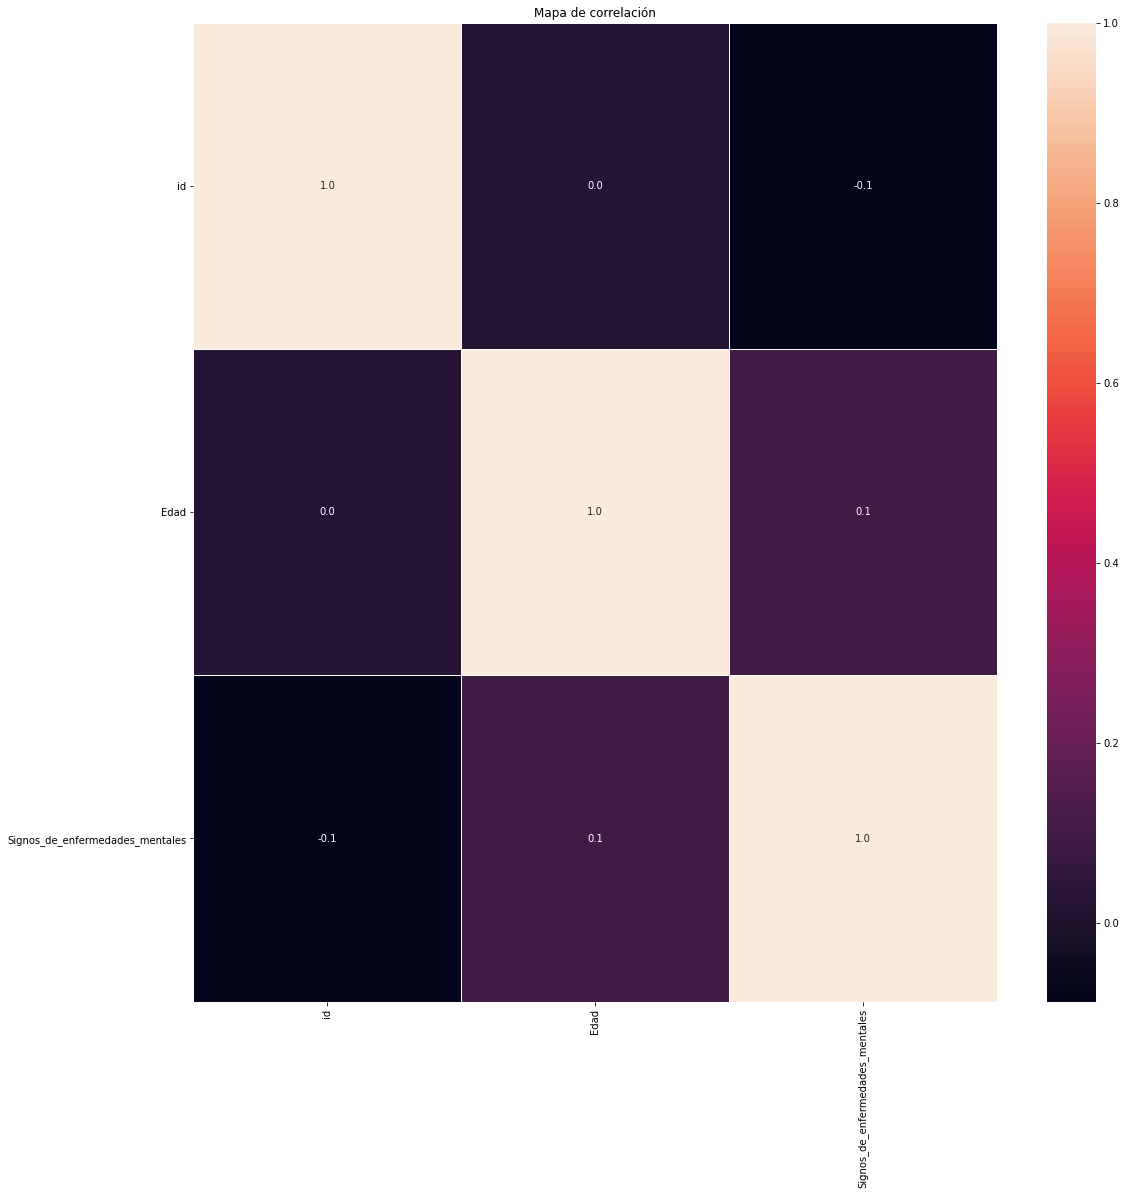

In [41]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(df_PS.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.show()

Mapa de correlación.

**Nota:** La mayoría de variables son categóricas, por lo que no funciona la correlación en todas.

**NOTA:** El gráfico de Hexplot, el KDEplot de 2 dimensiones, el JointPlot, PairPlot e ImPlot requieren de más de una variable cuantitativa y esta base de datos solo tiene una por lo que no es posible realizar correctamente los gráficos.

# Base de datos.

Base de datos: [Company Bankruptcy Prediction](https://www.kaggle.com/fedesoriano/company-bankruptcy-prediction?select=data.csv)

**Leer y mostrar los datos sin manipular**

In [42]:
 df_Bank = pd.read_csv("bankruptcy.csv")

In [43]:
df_Bank.shape

(6819, 96)

In [44]:
df_Bank.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object

In [45]:
df_Bank.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


**NOTA:** Algo a nuestro favor, es que son puros datos numéricos, por lo que es una ventaja para nosotros en cuanto a manipulación de datos.

In [46]:
df_Bank.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

**Eliminar columnas no deseadas**

* Pre-tax net Interest Rat: Se eliminó, debido a que consideramos redundante, ya que te da la tasa continua ya después de impuestos.
* After-tax net Interest Rate: Se eliminó, debido a que consideramos redundante, ya que te da la tasa continua ya después de impuestos.

**NOTA:** Solo se eliminaron algunas, hasta no ver con más detalle los datos es difícil eliminar tanta información.

In [47]:
df_Bank = df_Bank.drop([' Pre-tax net Interest Rate',' After-tax net Interest Rate'], axis=1)

**Manipulación de los datos tipo null.**

No hay datos tipo null.

In [48]:
df_Bank.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 94, dtype: int64

**Reenombrar Celdas.**

**NOTA:** Solo se cambiaron algunas columnas, ya que seguramente se necesiten eliminar varias columnas.
          Se dejaron aquellas columnas que nos ayuden a analizar los posibles factores que llevaron a la empresa a la
          bancarrota.

In [49]:
df_PS = df_PS.rename(columns={'ROA(B) before interest and depreciation after tax': 'ROA_después_de_impuestos', 
                              'Continuous interest rate (after tax)':'Tasa_continua',
                              'Cash flow rate':'Flujo_de_caja',
                              'After-tax Net Profit Growth Rate': 'Tasa_de_crecimiento_con_impuestos',
                              'Total Asset Growth Rate':'Tasa_de_crecimiento_de_activos totales',
                              'Cash Reinvestment %':'%_de_reinversión', 
                              'Interest Expense Ratio':'Radio_de_gastos_por_intereses',
                              ' Total debt/Total net worth':'Total_de_deuda',
                              'Long-term fund suitability ratio (A)':'Indice_de_fondo_idoneo_a_largo_plazo',
                              'Borrowing dependency':'Dependencia_de_prestamos',
                              'Contingent liabilities/Net worth':'Pasivos_contingentes',
                              ' Accounts Receivable Turnover': 'Rotacion_de_cuentas_por_cobrar' })

**Visualización después de limpieza y exportación de los datos.**

In [50]:
df_Bank.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.302646,0.780985,1.256969e-04,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.303556,0.781506,2.897851e-04,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.302035,0.780284,2.361297e-04,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.303350,0.781241,1.078888e-04,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.303475,0.781550,7.890000e+09,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [51]:
df_PS.shape

(4895, 13)

In [52]:
df_Bank.to_csv('DF_Bank.csv', index = False, header = True)

# Base de datos.

Base de datos: [World University Rankings](https://www.kaggle.com/mylesoneill/world-university-rankings?select=cwurData.csv)

**Leer y mostrar los datos sin manipular.**

In [53]:
df_Uni = pd.read_csv("University.csv")

In [54]:
df_Uni.shape

(2200, 14)

In [55]:
df_Uni.dtypes

world_rank                int64
institution              object
country                  object
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
broad_impact            float64
patents                   int64
score                   float64
year                      int64
dtype: object

In [56]:
df_Uni.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


**Eliminar columnas no deseadas.**
 * No se planea borrar nada de momento.

In [57]:
#df_Uni = df_Uni.drop([""], axis=1)

**Manipulación de los datos tipo null.**

Los datos de tipo null de la columna broad_impact se rellenaron con la media del resto de los datos.

In [58]:
df_Uni.isnull().sum()

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

In [59]:
mediaUniImpacto = df_Uni[df_Uni["broad_impact"].isnull() == False].mean()
mediaUniImpacto["broad_impact"]
df_Uni["broad_impact"] = df_Uni["broad_impact"].fillna(mediaUniImpacto["broad_impact"])
del mediaUniImpacto

**Nota:** Para los datos vacíos, reemplazamos los valores por la media de los valores de la columna de impacto global. Esto para que en caso de ser necesario hacer un comparativo entre las universidades en todas las variables de nuestra elección en cualquier momento.

**Reenombrar Celdas.**

In [60]:
df_Uni = df_Uni.rename(columns = {'world_rank':'Rango',
                                'institution':'Institucion',
                                'country':'Pais',
                                'national_rank': 'Rango_en _su _pais',
                                'quality_of_education':'Calidad_de_educacion',
                                'alumni_employment':'Ex_alumnos_rango_de_empleo',
                                'quality_of_faculty':'Rango_calidad_facultad',
                                'publications':'Rango _de_publicaciones',
                                'influence':'Rango_de_influencia',
                                'citations':'Citas',
                                'broad_impact':'Impacto',
                                'patents':'Patentes' , 
                                'score':'Puntuacion', 
                                'year':'Año'})

**Estadística básica.**

In [61]:
df_Uni['Puntuacion'].value_counts()

44.44    24
44.38    19
44.31    18
44.39    18
44.32    18
         ..
53.77     1
64.05     1
48.84     1
89.42     1
54.00     1
Name: Puntuacion, Length: 764, dtype: int64

**Observación:** Se contabilizó el numero de instituciones que se tienen por puntuación.Siendo algo interesante que gran cantidad de universidades tienen un puntaje menor a 60, tomando en cuenta que se califica de 1 a 100.

In [62]:
df_Uni['Pais'].value_counts().sum()

2200

**Observación:** Se sumó el número total de instituciones por país, teniendo en total 2200 universidades.

In [63]:
df_Uni['Institucion'].value_counts()

Sapienza University of Rome                      4
Texas A&M University, College Station            4
University of Texas MD Anderson Cancer Center    4
University of California, San Francisco          4
University of Rochester                          4
                                                ..
Henan Normal University                          1
Tianjin Medical University                       1
National Dong Hwa University                     1
National Research Nuclear University MEPhI       1
National University of Defense Technology        1
Name: Institucion, Length: 1024, dtype: int64

**Observación:** Se contabilizaron el número de instituciones que existen, teniendo a lo mucho 4 veces repetidas una universidad, si es que esta estuvo en el ranking dentro de los 4 años, en que se hizo el estudio.

In [64]:
df_Uni['Puntuacion'].describe()

count    2200.000000
mean       47.798395
std         7.760806
min        43.360000
25%        44.460000
50%        45.100000
75%        47.545000
max       100.000000
Name: Puntuacion, dtype: float64

**Observación:** Se analizó la puntuación para ver cómo estaban las instituciones, notando como se mencionó anteriormente que la mayoría de las universidades (tomando la puntuación del 75% de los datos), poseen una calificación menor al 60.

In [65]:
df_Uni['Calidad_de_educacion'].mean()

275.10045454545457

**Observación:** Para medió el promedio que tienen las instituciones en cuánto a calidad de educación.

In [66]:
df_Uni['Calidad_de_educacion'].median()

355.0

**Observación:** De entre los datos, se quiso observar cual era la mediana de la calidad de educación, para darnos una idea de la distribución de los datos.

In [67]:
df_Uni['Calidad_de_educacion'].std()

121.9351000405308

**Observación:** De entre la calidad de educación, quisimos conocer el valor máximo que se tiene entre las instituciones.

In [68]:
df_Uni['Calidad_de_educacion'].max()

367

**Observación:** Se quiso estudiar un poco más la distribución de los datos, obteniendo que se tiene una asimetría negativa. Teniendo que la calidad de la educación en general es muy buena en las instituciones educativas, dado que es mayor que el promedio.

In [69]:
df_Uni['Calidad_de_educacion'].skew()

-1.000066639458965

**Observación:** Para analizar si había una relación entre los datos, se examinó la correlación entre estos. Notando que el rango en el cual estan las universidades esta relacionado con el rango de publicaciones, el rango de influencia, las citas y el impacto, y un poco en menor medida pero de forma considerable el rango esta relacionado con la calidad de la educación, el rango de empleo de los ex alumnos, el rango de calidad de la facultad y las patentes. 
Algo interesante, es que el rango posee una correlación negativa con respecto a la puntuación.

In [70]:
df_Uni.corr()

,Rango,Rango_en _su _pais,Calidad_de_educacion,Ex_alumnos_rango_de_empleo,Rango_calidad_facultad,Rango _de_publicaciones,Rango_de_influencia,Citas,Impacto,Patentes,Puntuacion,Año
Rango,1.000000,0.238553,0.676166,0.668529,0.663864,0.923037,0.895871,0.856573,0.853083,0.698214,-0.549098,0.320844
Rango_en _su _pais,0.238553,1.000000,0.211975,0.135342,0.222833,0.326857,0.161086,0.186797,0.170417,0.159440,-0.199756,0.102951
Calidad_de_educacion,0.676166,0.211975,1.000000,0.606421,0.786181,0.624657,0.645641,0.630455,0.435879,0.528120,-0.600541,0.427732
Ex_alumnos_rango_de_empleo,0.668529,0.135342,0.606421,1.000000,0.558618,0.572096,0.527382,0.559200,0.371666,0.528219,-0.510374,0.427710
Rango_calidad_facultad,0.663864,0.222833,0.786181,0.558618,1.000000,0.634423,0.656406,0.652186,0.428516,0.555107,-0.693540,0.484788
Rango _de_publicaciones,0.923037,0.326857,0.624657,0.572096,0.634423,1.000000,0.874952,0.829912,0.831680,0.671558,-0.522111,0.318245
Rango_de_influencia,0.895871,0.161086,0.645641,0.527382,0.656406,0.874952,1.000000,0.845207,0.830123,0.611811,-0.522837,0.318298
Citas,0.856573,0.186797,0.630455,0.559200,0.652186,0.829912,0.845207,1.000000,0.769196,0.598728,-0.522438,0.328771
Impacto,0.853083,0.170417,0.435879,0.371666,0.428516,0.831680,0.830123,0.769196,1.000000,0.508507,-0.430408,-0.000077
Patentes,0.698214,0.159440,0.528120,0.528219,0.555107,0.671558,0.611811,0.598728,0.508507,1.000000,-0.474810,0.368570


**Observación:** Asimismo, se vio el grado de variación de los datos mediante la covarianza, el cual en la mayoría de los datos es muy grande, debido a la heterogeneidad que tienen los datos en cuanto al rango en que estan comprendidos.

In [71]:
df_Uni.cov()

,Rango,Rango_en _su _pais,Calidad_de_educacion,Ex_alumnos_rango_de_empleo,Rango_calidad_facultad,Rango _de_publicaciones,Rango_de_influencia,Citas,Impacto,Patentes,Puntuacion,Año
Rango,92610.883046,3756.208897,25090.710964,37999.668548,12940.021084,85325.970338,82697.881289,68913.128033,71019.327649,58218.971227,-1296.844868,74.413990
Rango_en _su _pais,3756.208897,2677.117668,1337.353580,1307.965670,738.478596,5137.155941,2528.196358,2555.112610,2412.134751,2260.347442,-80.212209,4.059697
Calidad_de_educacion,25090.710964,1337.353580,14868.168622,13811.196536,6140.110828,23136.694494,23880.176763,20323.080392,14539.496545,17644.381289,-568.300430,39.749287
Ex_alumnos_rango_de_empleo,37999.668548,1307.965670,13811.196536,34886.488848,6682.961227,32458.514088,29879.417455,27612.293206,18990.477655,27032.610725,-739.815933,60.884596
Rango_calidad_facultad,12940.021084,738.478596,6140.110828,6682.961227,4102.515913,12343.406787,12753.093334,11043.414574,7508.380003,9741.978720,-344.749347,23.664972
Rango _de_publicaciones,85325.970338,5137.155941,23136.694494,32458.514088,12343.406787,92270.351358,80618.202976,66645.291893,69110.146164,55893.294051,-1230.838437,73.675286
Rango_de_influencia,82697.881289,2528.196358,23880.176763,29879.417455,12753.093334,80618.202976,92010.194174,67777.798857,68883.440027,50848.789510,-1230.811052,73.583716
Citas,68913.128033,2555.112610,20323.080392,27612.293206,11043.414574,66645.291893,67777.798857,69889.672098,55628.582193,43369.161000,-1071.885442,66.241432
Impacto,71019.327649,2412.134751,14539.496545,18990.477655,7508.380003,69110.146164,68883.440027,55628.582193,74835.638199,38115.044075,-913.778515,-0.016144
Patentes,58218.971227,2260.347442,17644.381289,27032.610725,9741.978720,55893.294051,50848.789510,43369.161000,38115.044075,75074.095530,-1009.651954,76.965232


**Visualización después de limpieza y exportación de los datos.**

In [72]:
df_Uni.head()

,Rango,Institucion,Pais,Rango_en _su _pais,Calidad_de_educacion,Ex_alumnos_rango_de_empleo,Rango_calidad_facultad,Rango _de_publicaciones,Rango_de_influencia,Citas,Impacto,Patentes,Puntuacion,Año
0,1,Harvard University,USA,1,7,9,1,1,1,1,496.6995,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,496.6995,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,496.6995,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,496.6995,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,496.6995,18,85.21,2012


In [73]:
df_Uni.shape

(2200, 14)

In [74]:
df_Uni.to_csv('DF_Uni.csv', index = False, header = True)

**Conteo de los primeros 15 países.**

<AxesSubplot:title={'center':'Gráfica de barras por países'}>

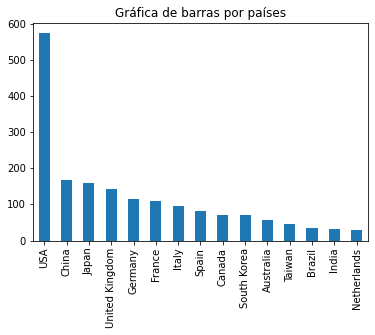

In [75]:
df_Uni['Pais'].value_counts().head(15).plot.bar(title="Gráfica de barras por países")

Gráfica de barras del conteo de universidades por países.

**Descripción:** El país con más universidades que están en el ranking de las mejores es EUA, seguido por China, Japón, UK y Alemania.

**Calidad de educación con mayor presencia en instituciones.**

<AxesSubplot:title={'center':'Gráfica de barra por calidad de educación'}>

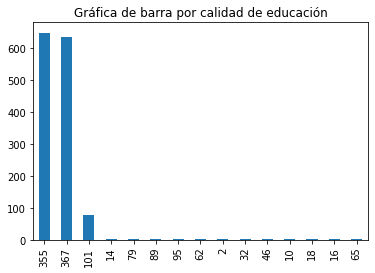

In [76]:
df_Uni['Calidad_de_educacion'].value_counts().sort_values(ascending = False).head(15).plot.bar(title="Gráfica de barra por calidad de educación")

*Gráfica de conteo de calidad de educación de las universidad, tomando las 15 con mayor cantidad.*

**Descripción:** El número de universidades con una gran calidad de educación es alto, aunque es extraño la heterogeneidad de la calidad de educación del resto de universidades.

**Análisis de la puntuación.**

In [77]:
df_Uni['Puntuacion'].value_counts().sort_index()

43.36     1
43.47     1
43.77     1
43.79     1
43.88     1
         ..
97.64     1
98.66     1
98.69     1
99.09     1
100.00    4
Name: Puntuacion, Length: 764, dtype: int64

<AxesSubplot:title={'center':'Gráfica de línea por puntuación'}>

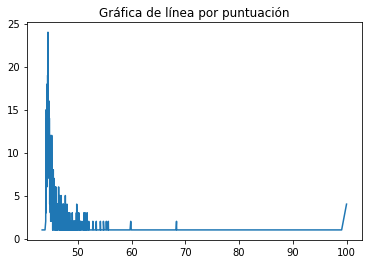

In [78]:
df_Uni['Puntuacion'].value_counts().sort_index().plot(title="Gráfica de línea por puntuación")

*Gráfica de línea de conteo de puntuación para observar la distribución que tienen las puntuaciones en las universidades.*

**Descripción:** Aquí se ve que la mayoría de las universidades tienen un puntaje mejor a 50.

<AxesSubplot:xlabel='Puntuacion', ylabel='Density'>

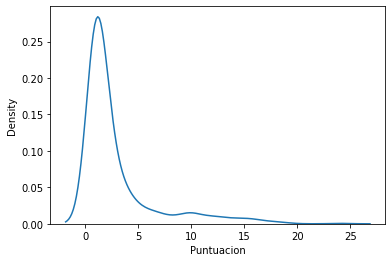

In [79]:
sns.kdeplot(df_Uni['Puntuacion'].value_counts().sort_index())

*Gráfica de línea de conteo de puntuaciones para observar la distribución que tienen las puntuaciones con técnica de KDE.*

<AxesSubplot:>

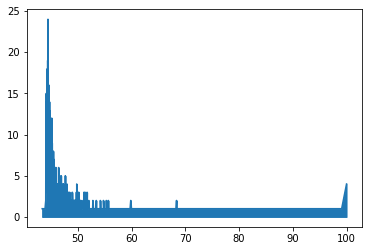

In [80]:
df_Uni['Puntuacion'].value_counts().sort_index().plot.area()

*Gráfica de área de conteo de puntuaciones para observar la distribución que tienen las puntuaciones*

**Análisis de calidad de educación.**

<AxesSubplot:ylabel='Frequency'>

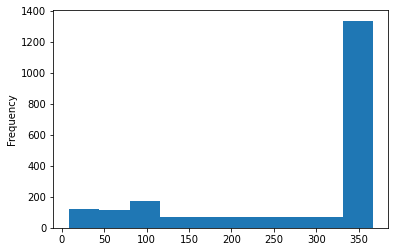

In [81]:
df_Uni[df_Uni['Calidad_de_educacion'] > 7]['Calidad_de_educacion'].plot.hist()

*Histograma de frecuencias de la calidad de eduación menor a 7.*

**Descripción:**  Aquí se aprecia mejor que mayormente las universidades tiene una alta calidad de educación.

C:\Users\almac\anaconda3\envs\R y Python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Calidad_de_educacion'>

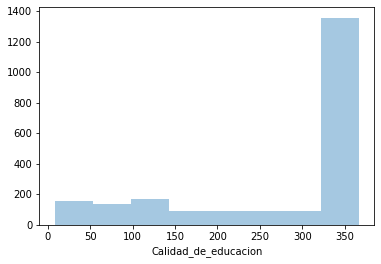

In [82]:
sns.distplot(df_Uni[df_Uni['Calidad_de_educacion'] > 7]['Calidad_de_educacion'], bins = 8, kde = False)

*Histograma de frecuencias de la calidad de eduación menor a 7 con 8 divisiones.*

C:\Users\almac\anaconda3\envs\R y Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Calidad_de_educacion', ylabel='count'>

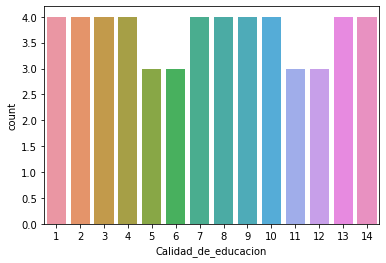

In [83]:
sns.countplot(df_Uni[df_Uni['Calidad_de_educacion']<15]['Calidad_de_educacion'])

*Grafica de barras de la calidad de eduación menor a 15 por seaborn. Este gráfico de colores podría ayudar a identificar mejor las diferentes barras.*

**Descripción:** Aquí se aprecia que son pocas las universidades con una calidad de educación menor a 15.

**Análisis de Puntuación.**

<AxesSubplot:xlabel='Año', ylabel='Puntuacion'>

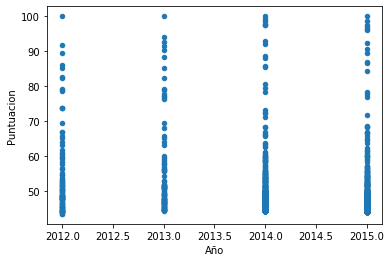

In [84]:
df_Uni.plot.scatter(x='Año', y='Puntuacion')

*Gráfica de dispersión de los años y las puntuaciones.*

**Descripción:** Se nota que en los cuatro años la puntuación de los países ha sido menor a 60, y se ve que en los últimos dos años empezó a haber más universidades con puntuaciones altas.

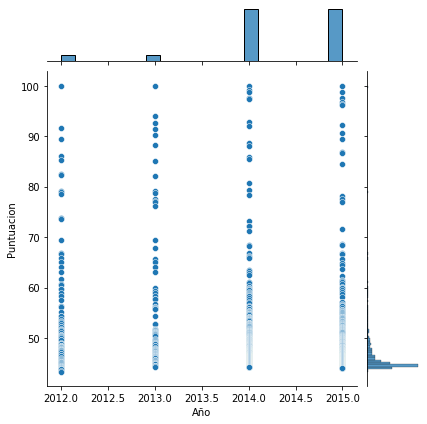

In [85]:
sns.jointplot(x='Año', y='Puntuacion', data = df_Uni)

*Gráfica de dispersión de los años y las puntuaciones  con histograma de cada uno.Esta gráfica es similar a la de dispersión de pandas, sin embargo el poder observar el histograma puede ser favorable para identificar más información.*

**Descripción:** Aquí se ve mejor cómo es que en los primeros dos años había una tendencia clara de las universidades a tener puntuaciones bajas.

**Análisis de Universidades por patentes y año.**

In [86]:
Conteo_universidades = df_Uni['Año'].groupby([df_Uni['Patentes'], df_Uni['Año']]).count().unstack().fillna(0)

<AxesSubplot:xlabel='Patentes'>

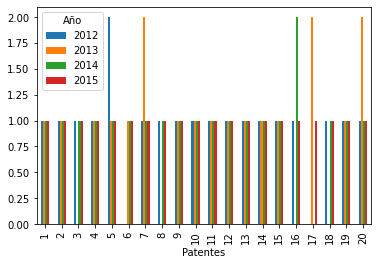

In [87]:
Conteo_universidades.head(20).plot.bar(stacked = False)

*Gráfica de patentes apiladas por año de 20 patentes.*

**Descripción:** Solo con esta gráfico se ve que en general en todos los años, han sido pocos lo países que han tenido menos de 21 patentes.

<AxesSubplot:xlabel='Patentes'>

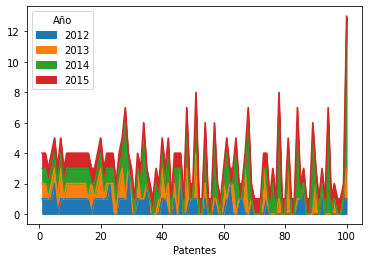

In [88]:
Conteo_universidades.head(100).plot.area()

*Gráfica de área de patentes apiladas por año de 100 patentes.*

**Descripción:** Se ve que el año donde hubo más patentes fue en 2015, de la muestra de 100 datos.

<AxesSubplot:xlabel='Patentes'>

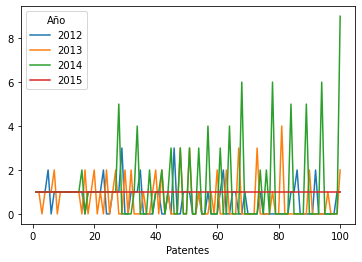

In [101]:
Conteo_universidades.head(100).plot.line()

*Gráfica de líneas de patentes apiladas por año de 100 patentes.*

**Descripción:** Este gráfico no parece muy útil para apreciar el comportamiento de las patentes de universidades por año.

**Análisis de Países por Puntuación.**

<AxesSubplot:xlabel='Pais', ylabel='Puntuacion'>

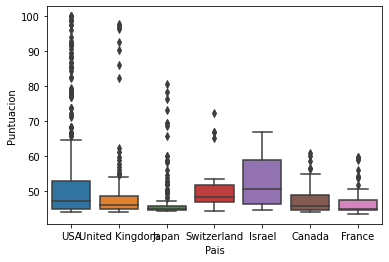

In [113]:
sns.boxplot(x = 'Pais', y = 'Puntuacion', 
            data = df_Uni[df_Uni.Pais.isin(df_Uni.Pais.head(60).value_counts().index)])

*Gráfica de caja para las puntuaciones de cada país.*

**Descripción:** Se ve, que en general la puntuación es menor a 60.

<AxesSubplot:xlabel='Pais', ylabel='Puntuacion'>

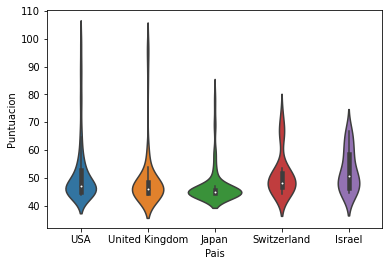

In [109]:
sns.violinplot(x = 'Pais', y = 'Puntuacion', 
            data = df_Uni[df_Uni.Pais.isin(df_Uni.Pais.head(20).value_counts().index)])

*Gráfica de violín para las puntuaciones de cada país.*

**Descripción:** Por países se ve que mayormente la puntuación esta entre 40 y 50.

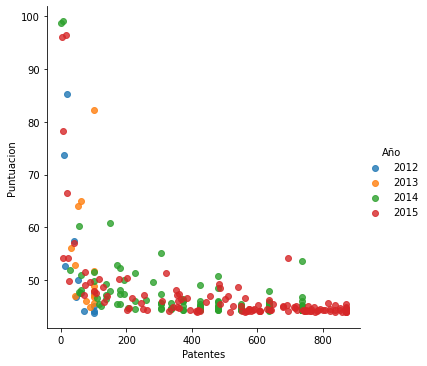

In [92]:
sns.lmplot(x = 'Patentes', y = 'Puntuacion', hue = 'Año', 
           data = df_Uni.sample(300), 
           fit_reg=False)

*Gráfica por puntuación y patentes. El color de cada punto esta separado por año, y los datos se tomaron de una muestra de 300 datos.*

**Descripción:** Hay que notar que aunque para el 2015 hubo más patentes, la puntuación que se obtuvo mayormente fue menor a 50. Asimismo analizando el número de patentes y la puntuación, la puntuación no se incrementa entre más patentes se posea.

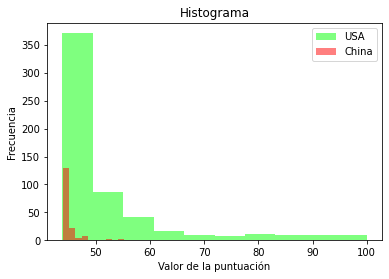

In [93]:
p1 = plt.hist(df_Uni[df_Uni["Pais"] == "USA"].Puntuacion,bins=10,fc = (0,1,0,0.5),label = "USA")
p2 = plt.hist(df_Uni[df_Uni["Pais"] == "China"].Puntuacion,bins=10,fc = (1,0,0,0.5),label = "China")
plt.legend()
plt.xlabel("Valor de la puntuación")
plt.ylabel("Frecuencia")
plt.title("Histograma")
plt.show()

*Histograma bi-variable de puntuaciones separados por 2 países, EUA y China.*

**Descripción:** Pese a que China y EUA, son los países con más universidades, la puntuación que tienen mayormente es baja, aunque por lo mismo de tener EUA la mayor cantidad de universidades estas tienen casi todo tipo de puntuaciones.

C:\Users\almac\anaconda3\envs\R y Python\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:xlabel='Puntuacion', ylabel='Patentes'>

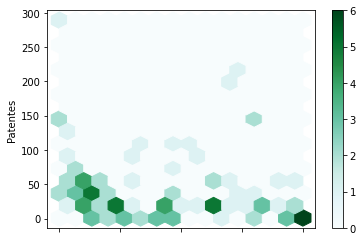

In [94]:
df_Uni[df_Uni['Puntuacion'] >60].plot.hexbin(x='Puntuacion', y='Patentes', gridsize=15)

*Gráfica de dispersión hexagonal de las patentes y las puntuaciones.*

**Descripción:** Es de notarse que, laen general las patentes son pocas, y las puntuaciones altas son poco frecuentes.

C:\Users\almac\anaconda3\envs\R y Python\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:xlabel='Puntuacion', ylabel='Patentes'>

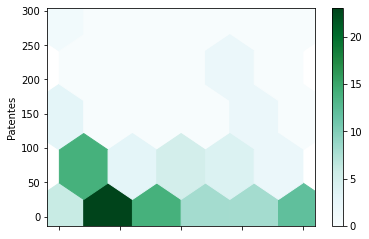

In [95]:
df_Uni[df_Uni['Puntuacion'] >60].plot.hexbin(x='Puntuacion', y='Patentes', gridsize=5)

*Gráfica de dispersión hexagonal de las patentes y las puntuaciones con hexágonos más grandes para distinguirlos más.*

**Descripción:** Aquí se ve que porque tengan más patentes no significa que tienen mayor puntuación, sino parece ser al contrario.

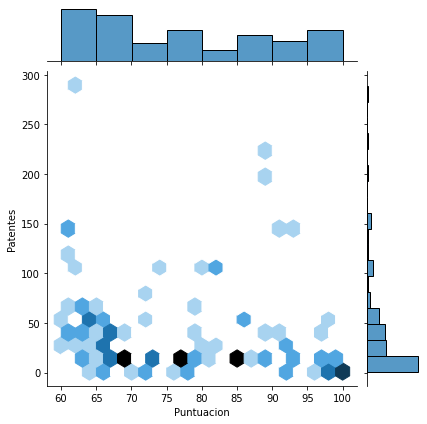

In [96]:
sns.jointplot(x='Puntuacion', y='Patentes', data=df_Uni[df_Uni['Puntuacion'] > 60], kind='hex', 
              gridsize=20)

*Gráfica de dispersión hexagonal de las patentes y las puntuaciones con histogramas cada uno.*

**Descripción:** Aquí se aprecia que hay un poco más de universidades que tinene puntuación de entre 60 y 70, y que para las puntuaciones con mayores a 60, son pocas las patentes que se tienen.

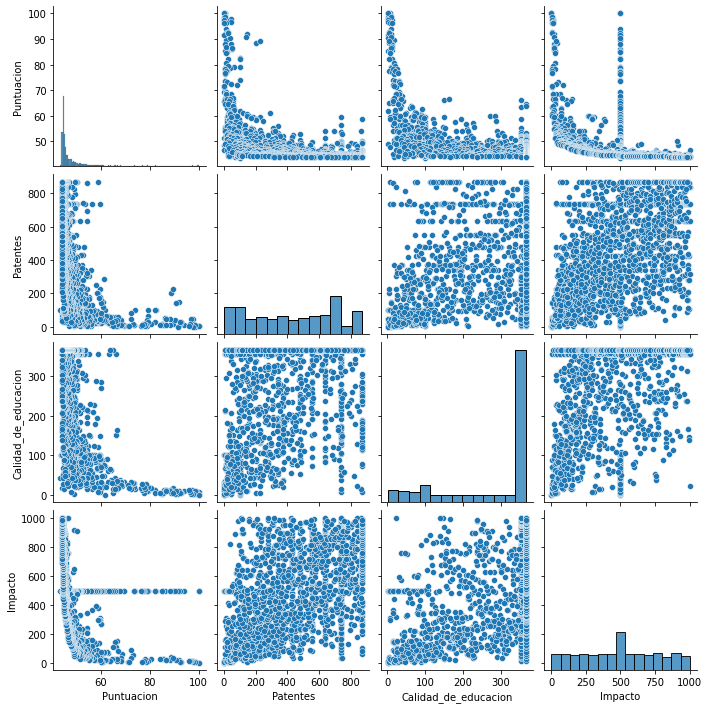

In [97]:
sns.pairplot(df_Uni[['Puntuacion', 'Patentes', 'Calidad_de_educacion', 'Impacto']])

*Gráfica de pares entre puntuación, patentes, calidad de educación e impacto.*

**Descripción:** Para las gráficas de pares iguales se presenta una gráfica de barras de la frecuencia cada uno. Para los pares de la puntuación, parece que las puntuaciones son bajas en todos los sentidos mayormente. En las patentes, parece no haber un patron de estas con la calidad de educación e impacto. Para la calidad de educación con valores altos parece no verse afectado por las patentes ni el impacto.

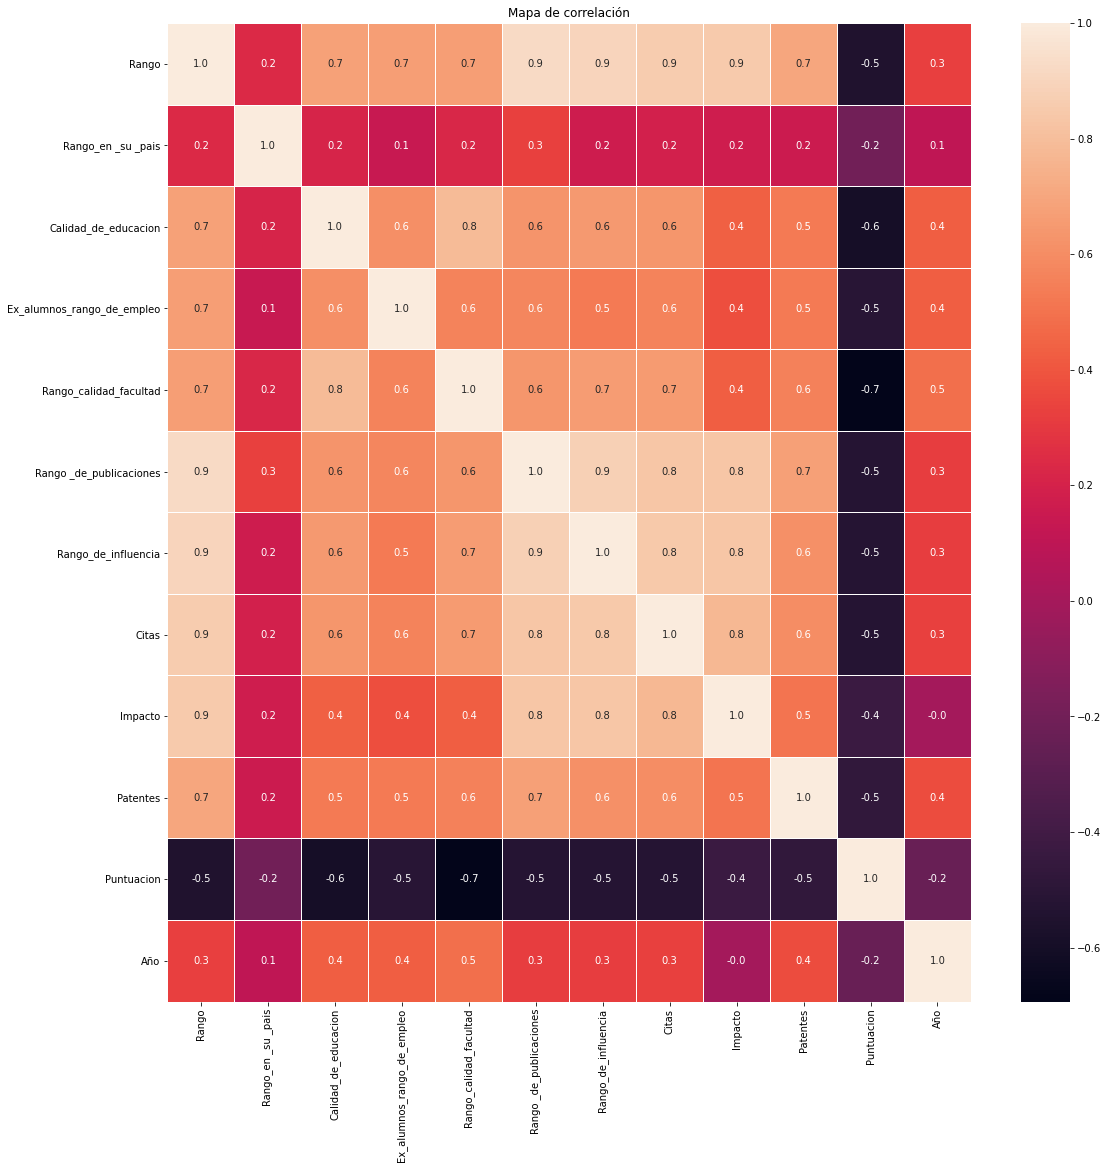

In [98]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(df_Uni.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.show()

*Mapa de correlación.*

**Descripción:** Dado que, se esta estudiando y haciendo el ranking de universidades, se ve que la mayoría de las columnas esta relacionada, a excepción de la puntuación, el rango en su país y el año, donde no es de extrañarse el año, sino la baja relación de la puntuación con las demás variables.
En general, las demás variables se relacionan considerablemente o fuertemente entre sí.